In [1]:
import zipfile
import os
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from transformers import CLIPProcessor, CLIPModel
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

In [2]:
#install SoccerNet library
!pip install SoccerNet --upgrade

import SoccerNet
from SoccerNet.Downloader import SoccerNetDownloader

#create downloader
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="/dataset/SoccerNet")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.0 MB/s eta 0:00:00


In [3]:
#set dataset directory
local_directory = "/content/SoccerNet"  # Colab의 경우 기본 경로

#create SoccerNetDownloader instance
my_downloader = SoccerNetDownloader(LocalDirectory=local_directory)

#download 10 games as test
download_index = 0

for download_index in range(0, 10):
  mySoccerNetDownloader.downloadGameIndex(download_index, files=["Labels-v3.json", "Frames-v3.zip"])

In [20]:
#download 10 games as test
download_index = 10

for download_index in range(10, 30):
  mySoccerNetDownloader.downloadGameIndex(download_index, files=["Labels-v3.json", "Frames-v3.zip"])

/dataset/SoccerNet/england_epl/2015-2016/2015-09-26 - 17-00 Liverpool 3 - 2 Aston Villa/Labels-v3.json already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-09-26 - 17-00 Liverpool 3 - 2 Aston Villa/Frames-v3.zip already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-10-17 - 17-00 Chelsea 2 - 0 Aston Villa/Labels-v3.json already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-10-17 - 17-00 Chelsea 2 - 0 Aston Villa/Frames-v3.zip already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool/Labels-v3.json already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool/Frames-v3.zip already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-11-07 - 18-00 Manchester United 2 - 0 West Brom/Labels-v3.json already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-11-07 - 18-00 Manchester United 2 - 0 West Brom/Frames-v3.zip already exists
/dataset/SoccerNet/england_epl/2015-2016/2015-11-21 - 20-30 

In [10]:
import json

folder1_path = "/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v3.json"
folder2_path = "/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal/Labels-v3.json"

#england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley
#open "Labels-v3.json" -1
with open(folder1_path, "r") as file1:
    data1 = json.load(file1)

#england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal
#open "Labels-v3.json" -2
with open(folder2_path, "r") as file2:
    data2 = json.load(file2)

# "actions" 섹션에서 각 이미지 파일의 label 추출
actions1 = data1["actions"]
actions2 = data2["actions"]

labels1 = {}
labels2 = {}

for image, metadata in actions1.items():
    labels1[image] = metadata["imageMetadata"]["label"]

for image, metadata in actions2.items():
    labels2[image] = metadata["imageMetadata"]["label"]

#print and check the pairing of images and labels
print("england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley")
for image, label in labels1.items():
    print(f"Image: {image}, Label: {label}")

print("\n\nengland_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal")
for image, label in labels2.items():
    print(f"Image: {image}, Label: {label}")

england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley
Image: 0.png, Label: Ball out of play
Image: 1.png, Label: Goal
Image: 2.png, Label: Clearance
Image: 3.png, Label: Shots off target
Image: 4.png, Label: Ball out of play
Image: 5.png, Label: Foul
Image: 6.png, Label: Corner
Image: 7.png, Label: Ball out of play
Image: 8.png, Label: Foul
Image: 9.png, Label: Foul
Image: 10.png, Label: Shots on target
Image: 11.png, Label: Ball out of play
Image: 12.png, Label: Ball out of play
Image: 13.png, Label: Shots on target
Image: 14.png, Label: Ball out of play
Image: 15.png, Label: Clearance
Image: 16.png, Label: Throw-in
Image: 17.png, Label: Shots off target
Image: 18.png, Label: Shots off target
Image: 19.png, Label: Ball out of play
Image: 20.png, Label: Goal
Image: 21.png, Label: Throw-in
Image: 22.png, Label: Shots off target


england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal
Image: 0.png, Label: Offside
Image: 1.png, Label: Foul
Image: 2.png, Label: Foul

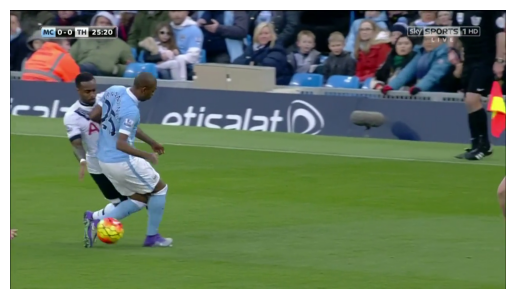

In [41]:
zip_path = "/dataset/SoccerNet/england_epl/2015-2016/2016-02-14 - 19-15 Manchester City 1 - 2 Tottenham/Frames-v3.zip"

#open zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    image_names = [name for name in zip_ref.namelist() if name.endswith(".png")]

    with zip_ref.open(image_names[0]) as image_file:
        image = Image.open(image_file)
        #visualization sample image
        plt.imshow(image)
        plt.axis("off") #set axes invisible.
        plt.show()

Loaded 69 images and 69 labels.


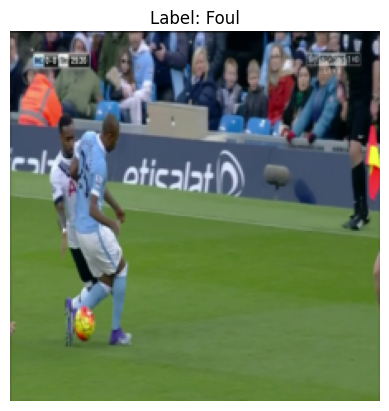

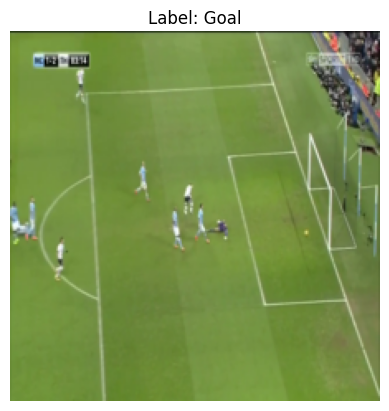

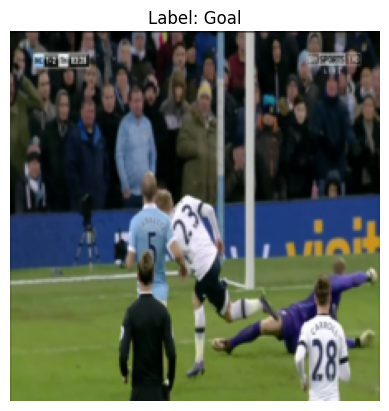

In [42]:
#matching png file from zip folder and label from json file
zip_path = "/dataset/SoccerNet/england_epl/2015-2016/2016-02-14 - 19-15 Manchester City 1 - 2 Tottenham/Frames-v3.zip"
json_path = "/dataset/SoccerNet/england_epl/2015-2016/2016-02-14 - 19-15 Manchester City 1 - 2 Tottenham/Labels-v3.json"

#image transformation pipeline (convert to PyTorch tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  #resize
    transforms.ToTensor(),          #convert to tensor
])

image_tensors = []
labels = []

with open(json_path, "r") as f:
    label_data = json.load(f)

#open zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    image_names = [name for name in zip_ref.namelist() if name.endswith(".png")]

    for image_name in image_names:
        #open png file
        with zip_ref.open(image_name) as image_file:
            image = Image.open(image_file).convert("RGB")  #convert to RGB
            #convert to image tensor
            image_tensor = transform(image)
            image_tensors.append(image_tensor)

        #find labels corresponding to image file and modify image name included '_' (underbar) to use as index
        if '_' in image_name:
          base_name = image_name.split("_")[0] + ".png"
        else:
          base_name = image_name
        label = label_data["actions"].get(base_name, {}).get("imageMetadata", {}).get("label", "Unknown")
        labels.append(label)

#check the number of images and labels
print(f"Loaded {len(image_tensors)} images and {len(labels)} labels.")

num_visualize = 3

for i in range(num_visualize):
    image = image_tensors[i].permute(1, 2, 0).numpy()
    label = labels[i]

    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Label: {label}")
    plt.show()

In [28]:
data_paths = [
    "/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley",
    "/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal",
    "/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Swansea 2 - 1 Manchester United",
    "/dataset/SoccerNet/england_epl/2014-2015/2015-02-22 - 19-15 Southampton 0 - 2 Liverpool",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-08-29 - 17-00 Chelsea 1 - 2 Crystal Palace",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-08-29 - 17-00 Manchester City 2 - 0 Watford",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-09-12 - 14-45 Everton 3 - 1 Chelsea",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-09-12 - 17-00 Crystal Palace 0 - 1 Manchester City",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-09-19 - 19-30 Manchester City 1 - 2 West Ham",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-09-26 - 17-00 Liverpool 3 - 2 Aston Villa",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-10-17 - 17-00 Chelsea 2 - 0 Aston Villa",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-10-31 - 15-45 Chelsea 1 - 3 Liverpool",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-11-07 - 18-00 Manchester United 2 - 0 West Brom",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-11-21 - 20-30 Manchester City 1 - 4 Liverpool",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-11-29 - 15-00 Tottenham 0 - 0 Chelsea",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-12-19 - 18-00 Chelsea 3 - 1 Sunderland",
    "/dataset/SoccerNet/england_epl/2015-2016/2015-12-26 - 18-00 Manchester City 4 - 1 Sunderland",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-01-03 - 16-30 Crystal Palace 0 - 3 Chelsea",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-01-13 - 22-45 Chelsea 2 - 2 West Brom",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-02-07 - 19-00 Chelsea 1 - 1 Manchester United",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-02-14 - 19-15 Manchester City 1 - 2 Tottenham",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-03-02 - 23-00 Liverpool 3 - 0 Manchester City",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-03-05 - 18-00 Chelsea 1 - 1 Stoke City",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-03-19 - 18-00 Chelsea 2 - 2 West Ham",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-04-09 - 17-00 Swansea 1 - 0 Chelsea",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-04-09 - 19-30 Manchester City 2 - 1 West Brom",
    "/dataset/SoccerNet/england_epl/2015-2016/2016-05-07 - 17-00 Sunderland 3 - 2 Chelsea",
    "/dataset/SoccerNet/england_epl/2016-2017/2016-08-14 - 18-00 Arsenal 3 - 4 Liverpool",
]

In [29]:
#split dataset as train, test, valid 3 categories
train_paths, temp_paths = train_test_split(data_paths, test_size=0.3, random_state=42)
test_paths, val_paths = train_test_split(temp_paths, test_size=0.33, random_state=42)

print("Train Paths:", train_paths)
print("Test Paths:", test_paths)
print("Validation Paths:", val_paths)

Train Paths: ['/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley', '/dataset/SoccerNet/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea', '/dataset/SoccerNet/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth', '/dataset/SoccerNet/england_epl/2015-2016/2015-08-29 - 17-00 Chelsea 1 - 2 Crystal Palace', '/dataset/SoccerNet/england_epl/2015-2016/2015-11-07 - 18-00 Manchester United 2 - 0 West Brom', '/dataset/SoccerNet/england_epl/2015-2016/2015-10-17 - 17-00 Chelsea 2 - 0 Aston Villa', '/dataset/SoccerNet/england_epl/2015-2016/2016-02-14 - 19-15 Manchester City 1 - 2 Tottenham', '/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Crystal Palace 1 - 2 Arsenal', '/dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Swansea 2 - 1 Manchester United', '/dataset/SoccerNet/england_epl/2015-2016/2016-03-19 - 18-00 Chelsea 2 - 2 West Ham', '/dataset/SoccerNet/england_epl/2014-2015/2015-02-22 - 19-15 Southampton 0 - 2 Li

In [8]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  #resize
    transforms.ToTensor(),          #convert to tensor
])

In [11]:
class SoccerNetDataset(Dataset):
    def __init__(self, data_paths, transform):
        self.data_paths = data_paths
        self.transform = transform
        self.image_tensors = []
        self.labels = []
        self.load_data()

    def load_data(self):
        for path in self.data_paths:
            zip_path = os.path.join(path, "Frames-v3.zip")      #zip -> png image
            json_path = os.path.join(path, "Labels-v3.json")    #json -> action label

            print(f"Loading JSON from: {json_path}")
            print(f"Loading ZIP from: {zip_path}")

            #load label data
            with open(json_path, "r") as f:
                label_data = json.load(f)

            #open zip file
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                image_names = [name for name in zip_ref.namelist() if name.endswith(".png")]

                for image_name in image_names:
                    #open and process image
                    with zip_ref.open(image_name) as image_file:
                        image = Image.open(image_file).convert("RGB")
                        image_tensor = self.transform(image)
                        self.image_tensors.append(image_tensor)

                    #extract label
                    base_name = image_name.split("_")[0] + ".png" if "_" in image_name else image_name
                    label = label_data["actions"].get(base_name, {}).get("imageMetadata", {}).get("label", "Unknown")
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_tensors)

    def __getitem__(self, idx):
        return {
            "image": self.image_tensors[idx],
            "label": self.labels[idx],
        }

#create data set
train_dataset = SoccerNetDataset(train_paths, transform)
test_dataset = SoccerNetDataset(test_paths, transform)
val_dataset = SoccerNetDataset(val_paths, transform)

#create dataloader
BATCH_SIZE = 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Loading JSON from: /dataset/SoccerNet/england_epl/2015-2016/2015-10-17 - 17-00 Chelsea 2 - 0 Aston Villa/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2015-2016/2015-10-17 - 17-00 Chelsea 2 - 0 Aston Villa/Frames-v3.zip
Loading JSON from: /dataset/SoccerNet/england_epl/2014-2015/2015-02-22 - 19-15 Southampton 0 - 2 Liverpool/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2014-2015/2015-02-22 - 19-15 Southampton 0 - 2 Liverpool/Frames-v3.zip
Loading JSON from: /dataset/SoccerNet/england_epl/2015-2016/2015-12-26 - 18-00 Manchester City 4 - 1 Sunderland/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2015-2016/2015-12-26 - 18-00 Manchester City 4 - 1 Sunderland/Frames-v3.zip
Loading JSON from: /dataset/SoccerNet/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth/Frames-v3.zip
Loading JSON from: /dataset/So

#Training
- LEARNING_RATE = 1e-5  
- EPOCH = 10   
- CLASS_PROMPTS = [f"This is a frame of a {cls}." for cls in SOCCERNET_CLASSES]

In [15]:
# CLIP 모델과 프로세서 초기화
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(DEVICE)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Optimizer 및 Scheduler
LEARNING_RATE = 1e-5
EPOCHS = 10
optimizer = torch.optim.AdamW(clip_model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

label_to_idx = {cls: idx for idx, cls in enumerate(SOCCERNET_CLASSES)}
idx_to_label = {idx: cls for cls, idx in label_to_idx.items()}

# Contrastive Loss 계산 함수
def contrastive_loss(logits_per_image, logits_per_text, batch_size):
    target = torch.arange(batch_size).to(DEVICE)
    image_loss = torch.nn.CrossEntropyLoss()(logits_per_image, target)
    text_loss = torch.nn.CrossEntropyLoss()(logits_per_text, target)
    return (image_loss + text_loss) / 2

SOCCERNET_CLASSES = list(set([data["label"] for data in train_dataset]))
CLASS_PROMPTS = [f"This is a frame of a {cls}." for cls in SOCCERNET_CLASSES]


# 학습 루프
clip_model.train()
for epoch in range(EPOCHS):
    total_loss = 0
    for batch in train_loader:
        # 데이터 로드
        images = batch["image"].to(DEVICE)
        labels = [label_to_idx[label] for label in batch["label"]]  # 문자열 라벨 -> 숫자 라벨 변환
        labels = torch.tensor(labels).to(DEVICE)

        texts = [CLASS_PROMPTS[label] for label in labels.cpu().numpy()]

        # CLIP 입력 데이터 생성
        inputs = clip_processor(text=texts, images=images, return_tensors="pt", padding=True, do_rescale=False).to(DEVICE)

        # 모델 출력
        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        # Loss 계산
        loss = contrastive_loss(logits_per_image, logits_per_text, batch_size=images.size(0))
        total_loss += loss.item()

        # Backpropagation 및 Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Learning Rate Scheduler 업데이트
    scheduler.step()

    # 에포크당 평균 손실 출력
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{EPOCHS}], Loss: {avg_loss:.4f}")

print("Training Complete!")

Epoch [1/10], Loss: 1.8681
Epoch [2/10], Loss: 1.6175
Epoch [3/10], Loss: 1.2950
Epoch [4/10], Loss: 1.0736
Epoch [5/10], Loss: 0.9552
Epoch [6/10], Loss: 0.8927
Epoch [7/10], Loss: 0.8012
Epoch [8/10], Loss: 0.7351
Epoch [9/10], Loss: 0.7243
Epoch [10/10], Loss: 0.7221
Training Complete!


In [17]:
# 모델을 평가 모드로 설정
clip_model.eval()

# 테스트 데이터셋에 대해 예측 수행
correct = 0
total = 0

with torch.no_grad():  # 평가 시에는 gradient 계산을 하지 않음
    for batch in test_loader:
        images = batch["image"].to(DEVICE)
        texts = batch["label"]

        # CLIP 입력 데이터 생성
        inputs = clip_processor(text=texts, images=images, return_tensors="pt", padding=True, do_rescale=False).to(DEVICE)

        # 모델 출력
        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        # 이미지와 텍스트의 유사도를 기반으로 예측
        predicted_labels = torch.argmax(logits_per_image, dim=1)  # 이미지에 대한 예측
        actual_labels = torch.arange(images.size(0)).to(DEVICE)  # 실제 라벨 (배치에서 순서대로)

        # 예측 정확도 계산
        correct += (predicted_labels == actual_labels).sum().item()
        total += images.size(0)

# 정확도 출력
accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 26.57%


#Training
- LEARNING_RATE = 1e-5  
- EPOCH = 10   
- CLASS_PROMPTS = [f"This is a frame of a {cls}." for cls in SOCCERNET_CLASSES]

In [18]:
# CLIP 모델과 프로세서 초기화
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(DEVICE)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Optimizer 및 Scheduler
LEARNING_RATE = 1e-5
EPOCHS = 15
optimizer = torch.optim.AdamW(clip_model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

label_to_idx = {cls: idx for idx, cls in enumerate(SOCCERNET_CLASSES)}
idx_to_label = {idx: cls for cls, idx in label_to_idx.items()}

# Contrastive Loss 계산 함수
def contrastive_loss(logits_per_image, logits_per_text, batch_size):
    target = torch.arange(batch_size).to(DEVICE)
    image_loss = torch.nn.CrossEntropyLoss()(logits_per_image, target)
    text_loss = torch.nn.CrossEntropyLoss()(logits_per_text, target)
    return (image_loss + text_loss) / 2

SOCCERNET_CLASSES = list(set([data["label"] for data in train_dataset]))
CLASS_PROMPTS = [f"frame of a {cls}." for cls in SOCCERNET_CLASSES]


# 학습 루프
clip_model.train()
for epoch in range(EPOCHS):
    total_loss = 0
    for batch in train_loader:
        # 데이터 로드
        images = batch["image"].to(DEVICE)
        labels = [label_to_idx[label] for label in batch["label"]]  # 문자열 라벨 -> 숫자 라벨 변환
        labels = torch.tensor(labels).to(DEVICE)

        texts = [CLASS_PROMPTS[label] for label in labels.cpu().numpy()]

        # CLIP 입력 데이터 생성
        inputs = clip_processor(text=texts, images=images, return_tensors="pt", padding=True, do_rescale=False).to(DEVICE)

        # 모델 출력
        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        # Loss 계산
        loss = contrastive_loss(logits_per_image, logits_per_text, batch_size=images.size(0))
        total_loss += loss.item()

        # Backpropagation 및 Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Learning Rate Scheduler 업데이트
    scheduler.step()

    # 에포크당 평균 손실 출력
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{EPOCHS}], Loss: {avg_loss:.4f}")

print("Training Complete!")

Epoch [1/15], Loss: 1.8850
Epoch [2/15], Loss: 1.5960
Epoch [3/15], Loss: 1.2928
Epoch [4/15], Loss: 1.0506
Epoch [5/15], Loss: 0.9050
Epoch [6/15], Loss: 0.8286
Epoch [7/15], Loss: 0.7771
Epoch [8/15], Loss: 0.7259
Epoch [9/15], Loss: 0.7329
Epoch [10/15], Loss: 0.7276
Epoch [11/15], Loss: 0.7077
Epoch [12/15], Loss: 0.6886
Epoch [13/15], Loss: 0.7198
Epoch [14/15], Loss: 0.6632
Epoch [15/15], Loss: 0.7017
Training Complete!


In [19]:
# 모델을 평가 모드로 설정
clip_model.eval()

# 테스트 데이터셋에 대해 예측 수행
correct = 0
total = 0

with torch.no_grad():  # 평가 시에는 gradient 계산을 하지 않음
    for batch in test_loader:
        images = batch["image"].to(DEVICE)
        texts = batch["label"]

        # CLIP 입력 데이터 생성
        inputs = clip_processor(text=texts, images=images, return_tensors="pt", padding=True, do_rescale=False).to(DEVICE)

        # 모델 출력
        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        # 이미지와 텍스트의 유사도를 기반으로 예측
        predicted_labels = torch.argmax(logits_per_image, dim=1)  # 이미지에 대한 예측
        actual_labels = torch.arange(images.size(0)).to(DEVICE)  # 실제 라벨 (배치에서 순서대로)

        # 예측 정확도 계산
        correct += (predicted_labels == actual_labels).sum().item()
        total += images.size(0)

# 정확도 출력
accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 27.46%


##Increasing Dataset Size

In [33]:
transform_basic = transforms.Compose([
    transforms.Resize((224, 224)),  #resize
    transforms.ToTensor(),          #convert to tensor
])

In [34]:
class SoccerNetDataset(Dataset):
    def __init__(self, data_paths, transform):
        self.data_paths = data_paths
        self.transform = transform_basic
        self.image_tensors = []
        self.labels = []
        self.load_data()

    def load_data(self):
        for path in self.data_paths:
            zip_path = os.path.join(path, "Frames-v3.zip")      #zip -> png image
            json_path = os.path.join(path, "Labels-v3.json")    #json -> action label

            print(f"Loading JSON from: {json_path}")
            print(f"Loading ZIP from: {zip_path}")

            #load label data
            with open(json_path, "r") as f:
                label_data = json.load(f)

            #open zip file
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                image_names = [name for name in zip_ref.namelist() if name.endswith(".png")]

                for image_name in image_names:
                    #open and process image
                    with zip_ref.open(image_name) as image_file:
                        image = Image.open(image_file).convert("RGB")
                        image_tensor = self.transform(image)
                        self.image_tensors.append(image_tensor)

                    #extract label
                    base_name = image_name.split("_")[0] + ".png" if "_" in image_name else image_name
                    label = label_data["actions"].get(base_name, {}).get("imageMetadata", {}).get("label", "Unknown")
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_tensors)

    def __getitem__(self, idx):
        return {
            "image": self.image_tensors[idx],
            "label": self.labels[idx],
        }

#create data set
train_dataset = SoccerNetDataset(train_paths, transform)
test_dataset = SoccerNetDataset(test_paths, transform)
val_dataset = SoccerNetDataset(val_paths, transform)

#create dataloader
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Loading JSON from: /dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frames-v3.zip
Loading JSON from: /dataset/SoccerNet/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2015-2016/2015-08-08 - 19-30 Chelsea 2 - 2 Swansea/Frames-v3.zip
Loading JSON from: /dataset/SoccerNet/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2015-2016/2015-12-05 - 20-30 Chelsea 0 - 1 Bournemouth/Frames-v3.zip
Loading JSON from: /dataset/SoccerNet/england_epl/2015-2016/2015-08-29 - 17-00 Chelsea 1 - 2 Crystal Palace/Labels-v3.json
Loading ZIP from: /dataset/SoccerNet/england_epl/2015-2016/2015-08-29 - 17-00 Chelsea 1 - 2 Crystal Palace/Frames-v3.zip
Loading JSON from: /dataset/SoccerNet/england_epl/2015-201

In [38]:
#create dataloader
BATCH_SIZE = 4
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Train dataset size: 1613
Test dataset size: 454
Validation dataset size: 261


In [39]:
# CLIP 모델과 프로세서 초기화
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(DEVICE)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Optimizer 및 Scheduler
LEARNING_RATE = 1e-5
EPOCHS = 20
optimizer = torch.optim.AdamW(clip_model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

label_to_idx = {cls: idx for idx, cls in enumerate(SOCCERNET_CLASSES)}
idx_to_label = {idx: cls for cls, idx in label_to_idx.items()}

# Contrastive Loss 계산 함수
def contrastive_loss(logits_per_image, logits_per_text, batch_size):
    target = torch.arange(batch_size).to(DEVICE)
    image_loss = torch.nn.CrossEntropyLoss()(logits_per_image, target)
    text_loss = torch.nn.CrossEntropyLoss()(logits_per_text, target)
    return (image_loss + text_loss) / 2

SOCCERNET_CLASSES = list(set([data["label"] for data in train_dataset]))
CLASS_PROMPTS = [f"frame of a {cls}." for cls in SOCCERNET_CLASSES]


# 학습 루프
clip_model.train()
for epoch in range(EPOCHS):
    total_loss = 0
    for batch in train_loader:
        # 데이터 로드
        images = batch["image"].to(DEVICE)
        labels = [label_to_idx[label] for label in batch["label"]]  # 문자열 라벨 -> 숫자 라벨 변환
        labels = torch.tensor(labels).to(DEVICE)

        texts = [CLASS_PROMPTS[label] for label in labels.cpu().numpy()]

        # CLIP 입력 데이터 생성
        inputs = clip_processor(text=texts, images=images, return_tensors="pt", padding=True, do_rescale=False).to(DEVICE)

        # 모델 출력
        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        # Loss 계산
        loss = contrastive_loss(logits_per_image, logits_per_text, batch_size=images.size(0))
        total_loss += loss.item()

        # Backpropagation 및 Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Learning Rate Scheduler 업데이트
    scheduler.step()

    # 에포크당 평균 손실 출력
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{EPOCHS}], Loss: {avg_loss:.4f}")

print("Training Complete!")

Epoch [1/20], Loss: 1.2811
Epoch [2/20], Loss: 1.0847
Epoch [3/20], Loss: 0.8931
Epoch [4/20], Loss: 0.6814
Epoch [5/20], Loss: 0.5885
Epoch [6/20], Loss: 0.5126
Epoch [7/20], Loss: 0.4731
Epoch [8/20], Loss: 0.4602
Epoch [9/20], Loss: 0.4237
Epoch [10/20], Loss: 0.4289
Epoch [11/20], Loss: 0.3877
Epoch [12/20], Loss: 0.3723
Epoch [13/20], Loss: 0.3714
Epoch [14/20], Loss: 0.3607
Epoch [15/20], Loss: 0.3645
Epoch [16/20], Loss: 0.3779
Epoch [17/20], Loss: 0.3340
Epoch [18/20], Loss: 0.3343
Epoch [19/20], Loss: 0.3491
Epoch [20/20], Loss: 0.3395
Training Complete!


In [40]:
# 모델을 평가 모드로 설정
clip_model.eval()

# 테스트 데이터셋에 대해 예측 수행
correct = 0
total = 0

with torch.no_grad():  # 평가 시에는 gradient 계산을 하지 않음
    for batch in test_loader:
        images = batch["image"].to(DEVICE)
        texts = batch["label"]

        # CLIP 입력 데이터 생성
        inputs = clip_processor(text=texts, images=images, return_tensors="pt", padding=True, do_rescale=False).to(DEVICE)

        # 모델 출력
        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        # 이미지와 텍스트의 유사도를 기반으로 예측
        predicted_labels = torch.argmax(logits_per_image, dim=1)  # 이미지에 대한 예측
        actual_labels = torch.arange(images.size(0)).to(DEVICE)  # 실제 라벨 (배치에서 순서대로)

        # 예측 정확도 계산
        correct += (predicted_labels == actual_labels).sum().item()
        total += images.size(0)

# 정확도 출력
accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 48.24%


# Using ResNet50

In [49]:
transform_advanced = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet-50의 기본 입력 크기인 224x224로 리사이징
    transforms.RandomHorizontalFlip(),  # 좌우 반전
    transforms.RandomRotation(15),  # 랜덤 회전
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 정규화
])

In [84]:
class SoccerNetDataset(Dataset):
    def __init__(self, data_paths, transform):
        self.data_paths = data_paths
        self.transform = transform
        self.image_tensors = []
        self.labels = []
        self.load_data()

    def load_data(self):
        for path in self.data_paths:
            zip_path = os.path.join(path, "Frames-v3.zip")      #zip -> png image
            json_path = os.path.join(path, "Labels-v3.json")    #json -> action label

            #print(f"Loading JSON from: {json_path}")
            #print(f"Loading ZIP from: {zip_path}")

            #load label data
            with open(json_path, "r") as f:
                label_data = json.load(f)

            #open zip file
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                image_names = [name for name in zip_ref.namelist() if name.endswith(".png")]

                for image_name in image_names:
                    #open and process image
                    with zip_ref.open(image_name) as image_file:
                        image = Image.open(image_file).convert("RGB")
                        image_tensor = self.transform(image)
                        #print(type(image_tensor))
                        self.image_tensors.append(image_tensor)

                    #extract label
                    base_name = image_name.split("_")[0] + ".png" if "_" in image_name else image_name
                    label = label_data["actions"].get(base_name, {}).get("imageMetadata", {}).get("label", "Unknown")
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_tensors)

    def __getitem__(self, idx):

        return {
            "image": self.image_tensors[idx],
            "label": self.labels[idx],
        }

#create data set
train_dataset_res = SoccerNetDataset(train_paths, transform_advanced)
test_dataset_res = SoccerNetDataset(test_paths, transform_advanced)
val_dataset_res = SoccerNetDataset(val_paths, transform_advanced)

#create dataloader
BATCH_SIZE = 16
train_loader_res = DataLoader(train_dataset_res, batch_size=BATCH_SIZE, shuffle=True)
test_loader_res = DataLoader(test_dataset_res, batch_size=BATCH_SIZE, shuffle=False)
val_loader_res = DataLoader(val_dataset_res, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train dataset size: {len(train_dataset_res)}")
print(f"Test dataset size: {len(test_dataset_res)}")
print(f"Validation dataset size: {len(val_dataset_res)}")

Train dataset size: 1613
Test dataset size: 454
Validation dataset size: 261


In [85]:
import torch
import torchvision
from torchvision import models, transforms
from torch import nn, optim

resnet = torchvision.models.resnet50(pretrained=True)

# SoccerNet 데이터셋의 action labels 개수에 맞게 마지막 FC Layer 수정
action_labels_count = len(SOCCERNET_CLASSES)  # SoccerNet의 액션 레이블 개수
resnet.fc = nn.Linear(resnet.fc.in_features, action_labels_count)

device_res = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet = resnet.to(device_res)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [86]:
# 손실 함수 (CrossEntropyLoss)
criterion_res = nn.CrossEntropyLoss()

# 옵티마이저 (Adam)
optimizer_res = optim.Adam(resnet.parameters(), lr=0.001)

In [87]:
# 모델 훈련 함수
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # 훈련 모드
        model.train()
        running_loss = 0.0
        running_corrects = 0

        # 훈련 데이터에서 배치 반복
        for batch in train_loader:
            # 데이터 로드
            inputs = batch["image"].to(device_res)
            labels = [label_to_idx[label] for label in batch["label"]]  # 문자열 라벨 -> 숫자 라벨 변환
            labels = torch.tensor(labels).to(device_res)

            # 옵티마이저 초기화
            optimizer.zero_grad()

            # 모델 출력을 얻고 손실 계산
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # 역전파
            loss.backward()
            optimizer.step()

            # 통계 기록
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        print(f'Training Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # 검증 모드
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for batch in val_loader:
                # 데이터 로드
                inputs = batch["image"].to(device_res)
                labels = [label_to_idx[label] for label in batch["label"]]  # 문자열 라벨 -> 숫자 라벨 변환
                labels = torch.tensor(labels).to(device_res)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f'Validation Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        # 모델 성능 향상 시 가중치 저장
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict()

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model

# 모델 훈련 시작
trained_model = train_model(resnet, train_loader_res, val_loader_res, criterion_res, optimizer_res, num_epochs=10)


Epoch 1/10
----------
Training Loss: 1.9534 Acc: 0.2877
Validation Loss: 1.7975 Acc: 0.3372
Epoch 2/10
----------
Training Loss: 1.7938 Acc: 0.3404
Validation Loss: 2.1625 Acc: 0.2375
Epoch 3/10
----------
Training Loss: 1.7293 Acc: 0.3583
Validation Loss: 1.7277 Acc: 0.3602
Epoch 4/10
----------
Training Loss: 1.7105 Acc: 0.3720
Validation Loss: 1.8809 Acc: 0.2912
Epoch 5/10
----------
Training Loss: 1.6585 Acc: 0.4073
Validation Loss: 1.8482 Acc: 0.2720
Epoch 6/10
----------
Training Loss: 1.6217 Acc: 0.3993
Validation Loss: 1.7156 Acc: 0.3563
Epoch 7/10
----------
Training Loss: 1.6146 Acc: 0.4098
Validation Loss: 1.6684 Acc: 0.3755
Epoch 8/10
----------
Training Loss: 1.5798 Acc: 0.4253
Validation Loss: 1.7009 Acc: 0.3908
Epoch 9/10
----------
Training Loss: 1.5598 Acc: 0.4408
Validation Loss: 1.6736 Acc: 0.3908
Epoch 10/10
----------
Training Loss: 1.5334 Acc: 0.4476
Validation Loss: 1.6048 Acc: 0.3525
Best val Acc: 0.3908


In [88]:
def evaluate_model(model, test_loader):
    model.eval()
    running_corrects = 0
    with torch.no_grad():
        for batch in test_loader:
                # 데이터 로드
            inputs = batch["image"].to(device_res)
            labels = [label_to_idx[label] for label in batch["label"]]  # 문자열 라벨 -> 숫자 라벨 변환
            labels = torch.tensor(labels).to(device_res)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    accuracy = running_corrects.double() / len(test_loader.dataset)
    print(f'Test Accuracy: {accuracy * 100:.4f}%')

evaluate_model(trained_model, test_loader_res)

Test Accuracy: 38.5463%


In [21]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# ResNet 초기화 (사전 학습된 ResNet-34 사용)
resnet = models.resnet34(pretrained=True)

# 최종 FC 레이어 제거하여 512차원 특징 추출
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()  # 평가 모드로 설정

# 디바이스 설정
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(DEVICE)

# 이미지 전처리 파이프라인
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet 입력 크기
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 사전 학습된 ResNet 정규화
])

# 특징 추출 함수
def extract_features(images):
    """
    ResNet을 사용해 이미지 특징 추출.
    Args:
        images (torch.Tensor): [B, C, H, W] 형태의 이미지 텐서
    Returns:
        torch.Tensor: [B, 512] 형태의 특징 벡터
    """
    with torch.no_grad():
        features = resnet(images)  # [B, 512, 1, 1]
        features = features.view(features.size(0), -1)  # [B, 512]
    return features


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 138MB/s]


In [24]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from transformers import CLIPModel, CLIPProcessor

# 디바이스 설정
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ResNet 초기화 (사전 학습된 ResNet-34 사용)
resnet = models.resnet34(pretrained=True)

# 최종 FC 레이어 제거하여 512차원 특징 추출
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()  # 평가 모드로 설정
resnet = resnet.to(DEVICE)

# CLIP 모델 및 프로세서 초기화
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(DEVICE)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# SoccerNet 클래스 및 텍스트 프롬프트 정의
SOCCERNET_CLASSES = list(set([data["label"] for data in train_dataset]))
CLASS_PROMPTS = [f"frame of a {cls}." for cls in SOCCERNET_CLASSES]

# 클래스와 인덱스 매핑
label_to_idx = {cls: idx for idx, cls in enumerate(SOCCERNET_CLASSES)}
idx_to_label = {idx: cls for cls, idx in label_to_idx.items()}

# 이미지 전처리 파이프라인
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet 입력 크기
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Contrastive Loss 계산 함수
def contrastive_loss(logits_per_image, logits_per_text, batch_size):
    target = torch.arange(batch_size).to(DEVICE)
    image_loss = torch.nn.CrossEntropyLoss()(logits_per_image, target)
    text_loss = torch.nn.CrossEntropyLoss()(logits_per_text, target)
    return (image_loss + text_loss) / 2

# Optimizer 및 Scheduler
LEARNING_RATE = 1e-5
EPOCHS = 15
optimizer = torch.optim.AdamW(list(resnet.parameters()) + list(clip_model.parameters()), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

# 학습 루프
clip_model.train()
resnet.train()
for epoch in range(EPOCHS):
    total_loss = 0
    for batch in train_loader:
        # 데이터 로드 및 전처리
        images = batch["image"].to(DEVICE)
        labels = [label_to_idx[label] for label in batch["label"]]  # 문자열 라벨 -> 숫자 라벨 변환
        labels = torch.tensor(labels).to(DEVICE)

        with torch.no_grad():
            image_features = resnet(images)  # [B, 512, 1, 1]
            image_features = image_features.view(image_features.size(0), -1)  # [B, 512]

        # 텍스트 프롬프트 생성
        texts = [CLASS_PROMPTS[label] for label in labels.cpu().numpy()]
        text_inputs = clip_processor(text=texts, images=None, return_tensors="pt", padding=True).to(DEVICE)

        # CLIP 텍스트 특징 추출
        text_features = clip_model.get_text_features(**text_inputs)

        # ResNet 특징과 텍스트 특징으로 Contrastive Loss 계산
        logits_per_image = torch.matmul(image_features, text_features.T)
        logits_per_text = logits_per_image.T
        loss = contrastive_loss(logits_per_image, logits_per_text, batch_size=images.size(0))
        total_loss += loss.item()

        # Backpropagation 및 Optimizer Step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Learning Rate Scheduler 업데이트
    scheduler.step()

    # 에포크당 평균 손실 출력
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{EPOCHS}], Loss: {avg_loss:.4f}")

print("Training Complete!")


Epoch [1/15], Loss: 3.5467
Epoch [2/15], Loss: 2.6623
Epoch [3/15], Loss: 2.2574
Epoch [4/15], Loss: 2.0051
Epoch [5/15], Loss: 1.9103
Epoch [6/15], Loss: 1.8212
Epoch [7/15], Loss: 1.7612
Epoch [8/15], Loss: 1.6942
Epoch [9/15], Loss: 1.6416
Epoch [10/15], Loss: 1.6269
Epoch [11/15], Loss: 1.5696
Epoch [12/15], Loss: 1.5573
Epoch [13/15], Loss: 1.5749
Epoch [14/15], Loss: 1.5252
Epoch [15/15], Loss: 1.5169
Training Complete!


In [ ]:
mySoccerNetDownloader.downloadGames(files=["Labels-v2.json"], split=["train","valid","test"])

In [ ]:
dir(mySoccerNetDownloader)

['LocalDirectory',
 'OwnCloudServer',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'client_id',
 'downloadDataTask',
 'downloadFile',
 'downloadGame',
 'downloadGameIndex',
 'downloadGames',
 'downloadRAWVideo',
 'downloadVideo',
 'downloadVideoHD',
 'password']

In [ ]:
help(mySoccerNetDownloader.downloadGame)

Help on method downloadGame in module SoccerNet.Downloader:

downloadGame(game, files=['1.mkv', '2.mkv', 'Labels.json'], spl='train', verbose=True) method of SoccerNet.Downloader.SoccerNetDownloader instance

